In [13]:
import sys
import os
import nibabel as nb
import numpy as np
import ext.neuron
import lab2im
import matplotlib.pyplot as plt
os.getcwd()

'/Users/cjb203/projects/lab2im/generated_images'

In [16]:
# Very simple script showing how to generate new images with random contrast

import os
from lab2im import utils
from lab2im.image_generator import ImageGenerator

os.chdir('/Users/cjb203/projects/lab2im/tutorials/')
# path of the input label map
path_label_map = './data_example/brain_label_map.nii.gz'
# path where to save the generated image
resulr_dir = './generated_images'

# generate an image from the label map.
# Because the image is spatially deformed, we also output the corresponding deformed label map.
brain_generator = ImageGenerator(path_label_map)
im, lab = brain_generator.generate_image()

# save output image and label map
if not os.path.exists(os.path.join(resulr_dir)):
    os.mkdir(resulr_dir)
utils.save_volume(im, brain_generator.aff, brain_generator.header, os.path.join(resulr_dir, 'brain.nii.gz'))
utils.save_volume(lab, brain_generator.aff, brain_generator.header, os.path.join(resulr_dir, 'labels.nii.gz'))

Compiling list of unique labels
processing 1/1


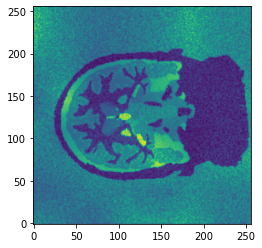

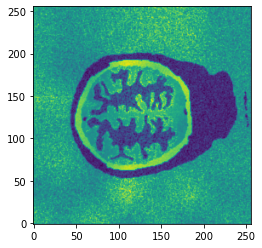

In [44]:
os.chdir('/Users/cjb203/projects/lab2im/tutorials/generated_images/')
im = nb.load('brain.nii.gz')
label = nb.load('labels.nii.gz')
im = np.array(im.dataobj)
label = np.array(label.dataobj)
plt.imshow(im[:,:,128],origin='lower')
plt.show()
plt.imshow(im[:,:,80],origin='lower')
plt.show()

(512, 512, 256)


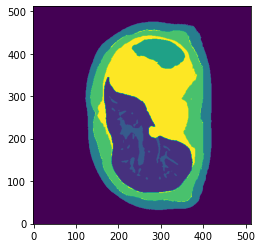

In [33]:
os.chdir('/Users/cjb203/projects/lab2im/')
liver = nb.load('liver_all_parts_seg_20180410.nii.gz')
liver = np.array(liver.dataobj)
print(liver.shape)
plt.imshow(liver[:,:,128],origin='lower')
plt.show()

In [34]:
# Very simple script showing how to generate new images with random contrast

import os
from lab2im import utils
from lab2im.image_generator import ImageGenerator

os.chdir('/Users/cjb203/projects/lab2im/')
# path of the input label map
path_label_map = './liver_all_parts_seg_20180410.nii.gz'
# path where to save the generated image
resulr_dir = './generated_images'

# generate an image from the label map.
# Because the image is spatially deformed, we also output the corresponding deformed label map.
brain_generator = ImageGenerator(path_label_map)
im, lab = brain_generator.generate_image()

# save output image and label map
if not os.path.exists(os.path.join(resulr_dir)):
    os.mkdir(resulr_dir)
utils.save_volume(im, brain_generator.aff, brain_generator.header, os.path.join(resulr_dir, 'liver.nii.gz'))
utils.save_volume(lab, brain_generator.aff, brain_generator.header, os.path.join(resulr_dir, 'labels.nii.gz'))

Compiling list of unique labels
processing 1/1


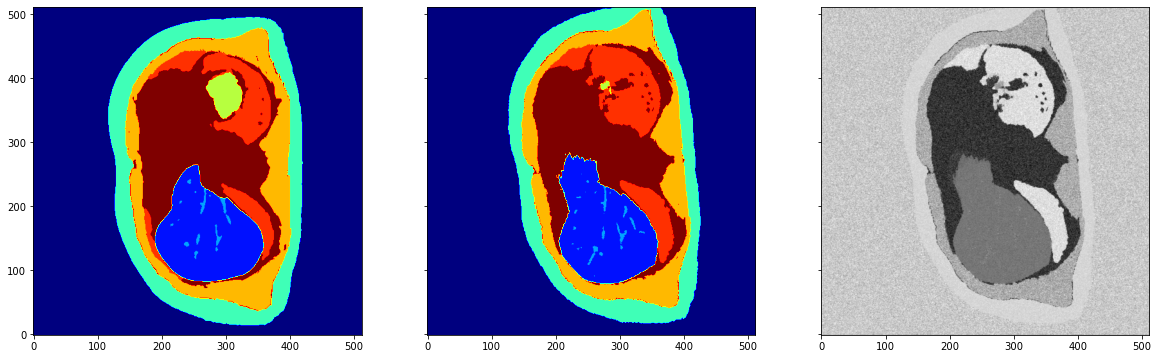

In [35]:
os.chdir('/Users/cjb203/projects/lab2im/generated_images/')
im = nb.load('liver.nii.gz')
label = nb.load('labels.nii.gz')
im = np.array(im.dataobj)
label = np.array(label.dataobj)
sl = 180
fig, (ax1, ax2, ax3) = plt.subplots(1,3,sharey=True,figsize=(20,20))
ax1.imshow(liver[:,:,sl],origin='lower',cmap='jet')
ax2.imshow(label[:,:,sl],origin='lower',cmap='jet')
ax3.imshow(im[:,:,sl],origin='lower',cmap='gray')
plt.show()

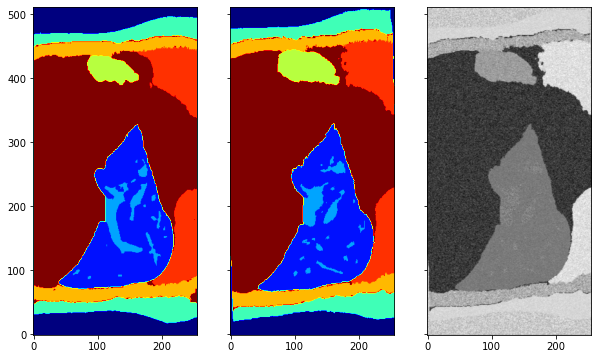

In [36]:
os.chdir('/Users/cjb203/projects/lab2im/generated_images/')
im = nb.load('liver.nii.gz')
label = nb.load('labels.nii.gz')
im = np.array(im.dataobj)
label = np.array(label.dataobj)
sl = 256
fig, (ax1, ax2, ax3) = plt.subplots(1,3,sharey=True,figsize=(10,10))
ax1.imshow(liver[:,sl,:],origin='lower',cmap='jet')
ax2.imshow(label[:,sl,:],origin='lower',cmap='jet')
ax3.imshow(im[:,sl,:],origin='lower',cmap='gray')
plt.show()